<a href="https://colab.research.google.com/github/electrojam/Curso-de-Matematicas-para-Data-Science_Probabilidad/blob/main/Distribucion_Binomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from numpy.random import binomial
from scipy.stats import binom
from math import factorial
import matplotlib.pyplot as plt

## Secuencias de eventos tipo Bernoulli

$$
P(k, n; p) = {n \choose k} p^k (1-p)^{n-k} = \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k}
$$

In [19]:
# Calculamos la distribución binomial, distribución de probabilidad, función binomial
# mediante nuestra propia función
def my_binomial(k, n, p):
  return factorial(n)*(1/(factorial(k)*factorial(n-k)))*pow(p,k)*pow(1-p,n-k)

In [4]:
# Calculamos función binomial, 2 caras, 3 lanzamientos, 0.5 de probabilidad equilibrada
my_binomial(2, 3, 0.5)

0.375

In [5]:
# Calculamos la distribución binomial, distribución de probabilidad, función binomial
# mediante librería externa
dist = binom(3, 0.5)
dist.pmf(2)

0.3750000000000001

## Validación del ejercicio hecho a mano

$$
P(k\leq 2, n=3, p=1/2) = \sum_{k=0}^2 \left[ \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k} \right] = \frac{7}{8}
$$


In [7]:
# Calculmaos la probabilidad de distribución acumulada
# para lanzamientos exitosos k <= 2
dist.cdf(2)

0.875

## Simulaciones de secuencias con generadores aleatorios

* Los generadores aleatorios tienen como propósito simular muestras de datos que resultarían de muestreos en la vida real de procesos aleatorios como lanzar una moneda o un dado.

In [11]:
# Simulación con n lanzamientos de moneda de probabilidada equilibrada

p=0.5
n=3
binomial(n, p)

3

In [12]:
# Simulamos 100 lanzamientos de moneda equilibrada

arr = []
for _ in range(100):
  arr.append(binomial(n, p))

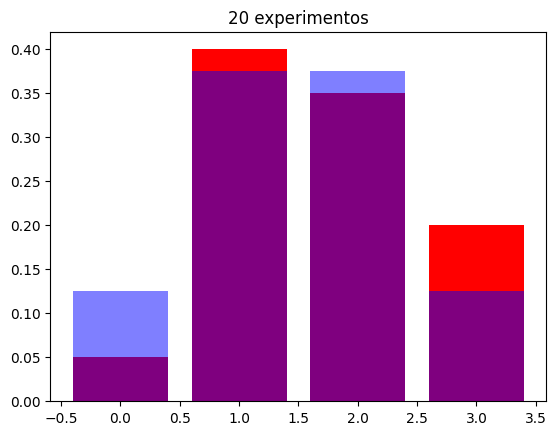

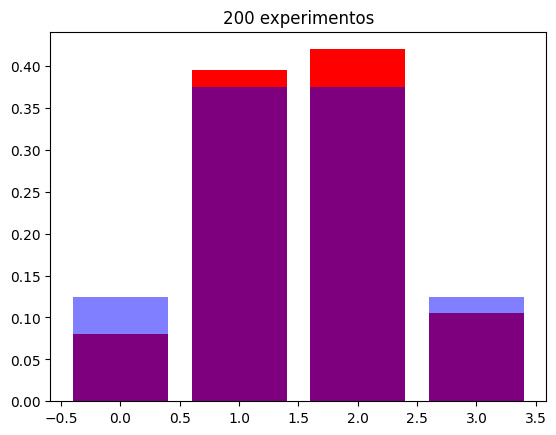

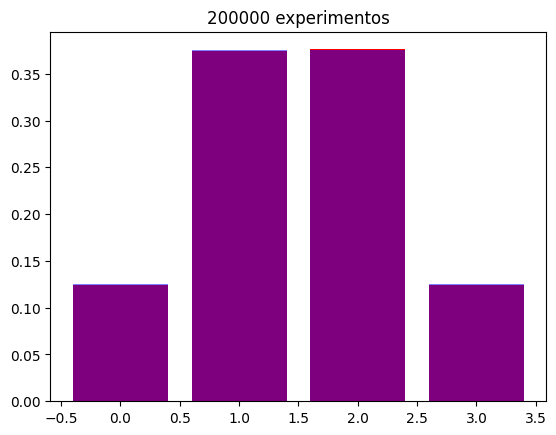

In [26]:
# Visualizamos los resultados

# Simulamos num_trials de lanzamientos de moneda equilibrada

def plot_hist(num_trials):
  values = [0,1,2,3]
  arr = []
  for _ in range(num_trials):
    arr.append(binomial(n, p))
  # Obtenmos las probabilidades
  sim = np.unique(arr, return_counts=True)[1]/len(arr)
  # Obtenemos distribución teórica
  teorica = [binom(3, 0.5).pmf(k) for k in values]

  # Dibujamos diagramas de barras de cada una de la distibución

  plt.bar(values, sim, color = 'red')
  plt.bar(values, teorica, alpha = 0.5, color = 'blue')
  plt.title('{} experimentos'.format(num_trials))
  plt.show()

# Llamamos la función
plot_hist(20)
plot_hist(200)
plot_hist(200000)
